In [3]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as inputData
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta

In [5]:
data = inputData.read_data_sets('data', one_hot=True)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [6]:
def plotNumbers(imset, valset, dimen):
    fig, axis = plt.subplots(dimen[0],dimen[1])

    for pos, sub in enumerate(axis.flat):
        sub.imshow(imset[pos].reshape((28,28)))
        sub.set_xticks([])
        sub.set_yticks([])
        sub.set_xlabel('pred:%r' %valset[pos])
    plt.show()

In [7]:
output_size = 10
input_size = 784
image_size = 28
num_input_layer = 1


filter_size = 5
cn1_layers = 12

#X = tf.placeholder(tf.float32, [None, image_size, image_size, num_input_layer])

X = tf.placeholder(tf.float32, [None, image_size*image_size])
X_shaped = tf.reshape(X, [-1, image_size, image_size, num_input_layer])

Y_ori = tf.placeholder(tf.float32, [None, output_size])

Wcn1 = tf.Variable(initial_value=tf.truncated_normal([filter_size, filter_size, num_input_layer, cn1_layers], stddev=0.1))
bcn1 = tf.Variable(initial_value=tf.ones(cn1_layers)/10)

cn1 = tf.nn.conv2d(X_shaped, Wcn1, [1, 1, 1, 1], 'SAME') + bcn1
Y_cn1 = tf.nn.relu(cn1)

print('1st layer input is  %a' %X_shaped)
print('weight is           %a' %Wcn1)
print('conv net, cn1 is    %a' %cn1)
print('relu out, Y_cn1 is  %a' %Y_cn1)

1st layer input is  <tf.Tensor 'Reshape:0' shape=(?, 28, 28, 1) dtype=float32>
weight is           <tf.Variable 'Variable:0' shape=(5, 5, 1, 12) dtype=float32_ref>
conv net, cn1 is    <tf.Tensor 'add:0' shape=(?, 28, 28, 12) dtype=float32>
relu out, Y_cn1 is  <tf.Tensor 'Relu:0' shape=(?, 28, 28, 12) dtype=float32>


In [8]:
cn_shape = Y_cn1.shape
cn_num_elements = cn_shape[1:4].num_elements()

Y_cn1 = tf.reshape(Y_cn1, (-1, cn_num_elements))
print('new relu out,Y_cn1 is %a' %Y_cn1)

new relu out,Y_cn1 is <tf.Tensor 'Reshape_1:0' shape=(?, 9408) dtype=float32>


In [9]:
WL = tf.Variable(initial_value=tf.truncated_normal([cn_num_elements, output_size], stddev=0.1))
bL = tf.Variable(initial_value=tf.ones(output_size)/10)

print(WL)
print(bL)

<tf.Variable 'Variable_2:0' shape=(9408, 10) dtype=float32_ref>
<tf.Variable 'Variable_3:0' shape=(10,) dtype=float32_ref>


In [10]:
lgL = tf.matmul(Y_cn1, WL) + bL
Y_pred = tf.nn.softmax(lgL)

In [11]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=lgL, labels=Y_ori)
cost = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(0.003).minimize(cost)

correct_prediction = tf.equal(tf.argmax(Y_pred, axis=1), tf.argmax(Y_ori, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [14]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accu_list = []
cost_list = []
iteration = 1
#acc_check_list = np.arange(0, iteration, int(iteration/50))

start_time = time.time()
for val in range(iteration):
    next_batch_x, next_batch_y = data.train.next_batch(100)
    sess.run(optimizer, feed_dict={X: next_batch_x, Y_ori: next_batch_y})
    
    #if val in acc_check_list:
        #accu, cost_ = sess.run((accuracy, cost), feed_dict={X: data.test.images, Y_ori: data.test.labels })
        #accu_list.append(accu)
        #cost_list.append(cost_)
        
    accu, cost_ = sess.run((accuracy, cost), feed_dict={X: data.test.images, Y_ori: data.test.labels })
    accu_list.append(accu)
    cost_list.append(cost_)

#accu = sess.run(accuracy, feed_dict={X: data.test.images, Y_ori: data.test.labels })
#accu_list.append(accu)
print(accu_list)

end_time = time.time()
print('total time taken is %s' %str(timedelta(seconds=int(round(end_time-start_time)))))

[0.1405]
total time taken is 0:00:04


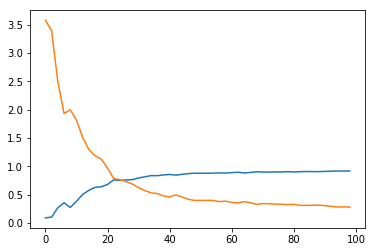

In [287]:
plt.plot(acc_check_list, accu_list[:])
#plt.axis([0,iteration,0.88,0.99])

plt.plot(acc_check_list, cost_list[:])
plt.show()

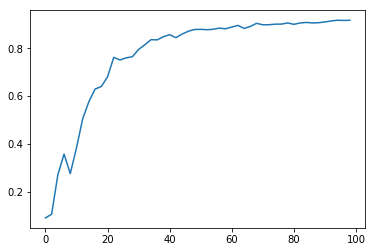

In [288]:
plt.plot(acc_check_list, accu_list[:])
#plt.axis([0,iteration,0.88,0.99])
plt.show()

In [ ]:
#total time taken is 0:02:40
#total time taken is 0:02:36
#total time taken is 0:02:35
# iter: 1000, total time taken is 0:04:07

In [ ]:
[0.1717, 0.1979, 0.2371, 0.2434, 0.2556, 0.1824, 0.2206, 0.3259, 0.4307, 0.4427, 0.4819, 0.5067, 0.5266, 0.5502, 0.5915, 0.64, 
 0.6575, 0.6464, 0.6448, 0.6751, 0.7209, 0.7353, 0.7296, 0.739, 0.7456, 0.7521, 0.7635, 0.7928, 0.81, 0.8197, 0.8182, 0.808, 
 0.8076, 0.8228, 0.8343, 0.8447, 0.8498, 0.8457, 0.8452, 0.8475, 0.8511, 0.8574, 0.8684, 0.8676, 0.8663, 0.8611, 0.8613, 0.8659, 
 0.8743, 0.8798]
#total time taken is 0:02:16
#iterations:50

[0.0903, 0.1056, 0.2703, 0.3575, 0.2757, 0.3833, 0.505, 0.5767, 0.6295, 0.6399, 0.6805, 0.762, 0.7511, 0.76, 0.7646, 0.7951, 
 0.8146, 0.836, 0.8352, 0.8483, 0.857, 0.8443, 0.8594, 0.8712, 0.8785, 0.8793, 0.8777, 0.8795, 0.8844, 0.8817, 0.8887, 0.8957, 
 0.8831, 0.8916, 0.9044, 0.8982, 0.8986, 0.9008, 0.9012, 0.9059, 0.9002, 0.9058, 0.9081, 0.906, 0.9071, 0.9101, 0.9143, 0.9173, 
 0.9165, 0.9172]
#total time taken is 0:02:17
#iterations:100

[0.1069, 0.6845, 0.852, 0.8856, 0.9076, 0.9021, 0.9246, 0.9304, 0.937, 0.943, 0.9451, 0.9516, 0.9441, 0.9541, 0.9594, 0.9596, 
 0.9612, 0.961, 0.9628, 0.9679, 0.9662, 0.9668, 0.9687, 0.9692, 0.9698, 0.9683, 0.9713, 0.9702, 0.9715, 0.9716, 0.9719, 0.9743, 
 0.9718, 0.9742, 0.9736, 0.9735, 0.9733, 0.9734, 0.9749, 0.9751, 0.9765, 0.9773, 0.9766, 0.977, 0.9754, 0.9782, 0.9791, 0.9786, 
 0.9756, 0.9764]
#total time taken is 0:03:25
#iterations:1000

[0.1572, 0.8915, 0.9204, 0.9458, 0.9529, 0.9657, 0.96, 0.9701, 0.9714, 0.9738, 0.9719, 0.9763, 0.9775, 0.9775, 0.98, 0.9788, 
 0.9799, 0.9799, 0.9791, 0.9819, 0.98, 0.9792, 0.9795, 0.9773, 0.983, 0.9747, 0.9816, 0.9806, 0.9797, 0.9813, 0.9831, 0.9823, 
 0.978, 0.9823, 0.9825, 0.9809, 0.9795, 0.9829, 0.9816, 0.9834, 0.9827, 0.9847, 0.9804, 0.9817, 0.982, 0.9831, 0.9821, 0.9838, 
 0.9837, 0.9834]
#total time taken is 0:05:20
#iterations:3000